In [1]:
# import main libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from collections import Counter
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
# load and read our dataset for initial exploration
df = pd.read_csv('new_df.csv', sep = ',')

# preview our data
df.head(5)

user_id           created_at  birthyear  gender  is_active  maildomain  \
0   161784  2017-06-27 19:26:51       1990     NaN          0        5910   
1   245769  2017-11-22 04:59:44       1983     NaN          0        5910   
2   140191  2017-05-16 15:52:38       1983     1.0          1        5326   
3   176141  2017-07-21 10:16:49       1983     NaN          0        5326   
4    97642  2017-02-19 07:46:55       1994     NaN          0        5326   

   region  orig_1   orig_2  utm_src ...   channel       dx_0      dx_1  \
0   308.0    45.0      NaN     74.0 ...       7.0  31.104501  5.609922   
1   290.0    42.0      NaN     74.0 ...       7.0  49.740220  2.608536   
2   308.0    15.0      NaN     67.0 ...       4.0  73.959020  3.132140   
3   308.0    49.0  21385.0     55.0 ...       9.0  54.493092  4.176993   
4    59.0    49.0  13773.0     55.0 ...       9.0  54.268673  4.419244   

        dx_2       dx_3         gx        im  purchase_90_n  purchase_90_bin  \
0  38.011426  73.155654 -40.377089  0.340052            0.0                0   
1  48.953180  75.468076 -24.818587  0.782523            0.0                0   
2  38.453700  60.172579  82.574758  0.128822            5.0                1   
3  50.066720  36.941482 -53.010936  0.088452            0.0                0   
4  68.248199  40.742681 -90.132536  0.252442            0.0                0   

   age  
0   29  
1   36  
2   36  
3   36  
4   25  

[5 rows x 22 columns]

In [3]:
# drop some columns
new_df = df.drop(['created_at','birthyear','purchase_90_n'],axis=1)
new_df.head(5)

user_id  gender  is_active  maildomain  region  orig_1   orig_2  utm_src  \
0   161784     NaN          0        5910   308.0    45.0      NaN     74.0   
1   245769     NaN          0        5910   290.0    42.0      NaN     74.0   
2   140191     1.0          1        5326   308.0    15.0      NaN     67.0   
3   176141     NaN          0        5326   308.0    49.0  21385.0     55.0   
4    97642     NaN          0        5326    59.0    49.0  13773.0     55.0   

   utm_med  utm_cpg  channel       dx_0      dx_1       dx_2       dx_3  \
0     14.0      0.0      7.0  31.104501  5.609922  38.011426  73.155654   
1     14.0      0.0      7.0  49.740220  2.608536  48.953180  75.468076   
2      5.0      0.0      4.0  73.959020  3.132140  38.453700  60.172579   
3     13.0      0.0      9.0  54.493092  4.176993  50.066720  36.941482   
4     13.0      0.0      9.0  54.268673  4.419244  68.248199  40.742681   

          gx        im  purchase_90_bin  age  
0 -40.377089  0.340052                0   29  
1 -24.818587  0.782523                0   36  
2  82.574758  0.128822                1   36  
3 -53.010936  0.088452                0   36  
4 -90.132536  0.252442                0   25

In [4]:
# sanity check
new_df.shape

(50000, 19)

In [5]:
new_df.describe()

user_id       gender     is_active    maildomain        region  \
count   50000.000000  5431.000000  50000.000000  50000.000000  49827.000000   
mean   159249.006700     0.528632      0.068600   6149.670880    395.650772   
std     92327.332749     0.499226      0.252775   2033.609336    230.330474   
min         0.000000     0.000000      0.000000      4.000000      1.000000   
25%     78979.750000     0.000000      0.000000   5326.000000    234.000000   
50%    159197.000000     1.000000      0.000000   5326.000000    308.000000   
75%    239042.500000     1.000000      0.000000   5910.000000    598.000000   
max    319641.000000     1.000000      1.000000  13604.000000    940.000000   

             orig_1        orig_2       utm_src       utm_med       utm_cpg  \
count  49529.000000  24430.000000  49997.000000  49996.000000  50000.000000   
mean      43.848392  15916.429718     70.106066     11.945216      0.000560   
std       20.311496   9569.291488     20.596572      4.600871      0.072386   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       22.000000   6172.000000     55.000000      8.000000      0.000000   
50%       45.000000  17348.500000     67.000000     13.000000      0.000000   
75%       64.000000  24244.000000     74.000000     14.000000      0.000000   
max       76.000000  30446.000000    185.000000     28.000000     10.000000   

            channel          dx_0          dx_1          dx_2          dx_3  \
count  49999.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       5.975220     50.023323      4.996994     49.947865     48.394240   
std        3.024429     10.057470      2.611690      9.991934     14.962197   
min        0.000000      7.926477     -8.426272     10.348532    -11.507265   
25%        4.000000     43.325705      3.257855     43.131497     38.314548   
50%        7.000000     50.055433      4.998784     49.989463     48.381867   
75%        9.000000     56.744732      6.737399     56.667394     58.465906   
max       12.000000     93.441389     18.347194     91.989327    108.168888   

                 gx            im  purchase_90_bin          age  
count  50000.000000  5.000000e+04     50000.000000  50000.00000  
mean       0.313389  5.010035e-01         0.185420     34.87328  
std       40.110482  2.890637e-01         0.388642      9.09721  
min     -196.201315  4.647376e-07         0.000000     18.00000  
25%      -26.726727  2.503440e-01         0.000000     28.00000  
50%        0.423808  5.014877e-01         0.000000     35.00000  
75%       27.289090  7.518443e-01         0.000000     38.00000  
max      156.352032  9.999910e-01         1.000000     80.00000

# Visualicemos nuestros datos

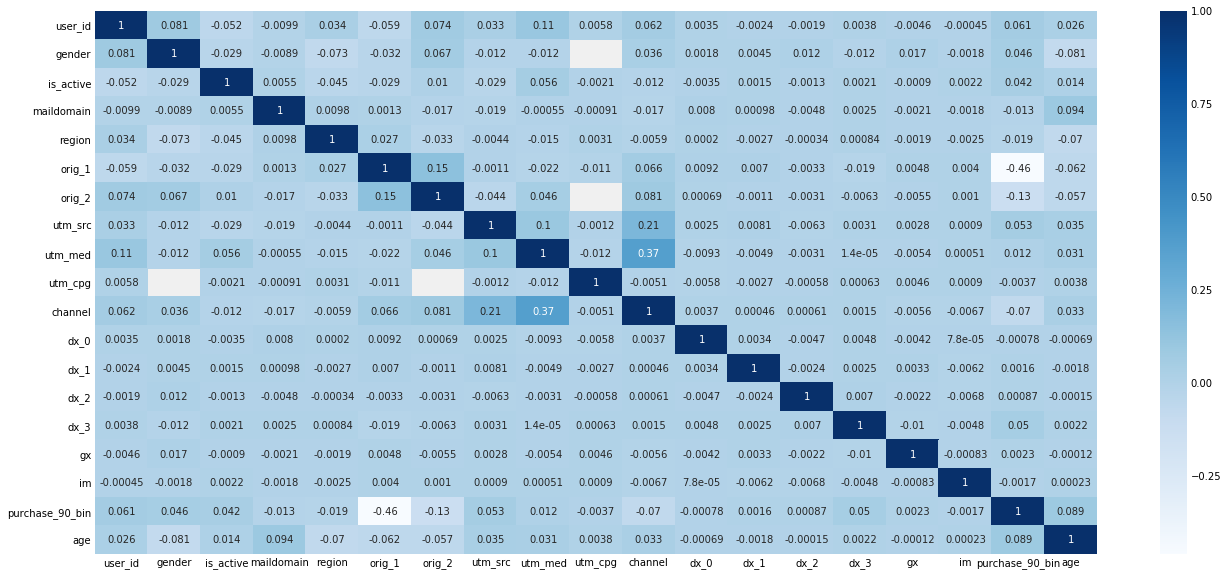

In [6]:
# DF correlation 
plt.figure(figsize = (20,10))
sns.heatmap(new_df.corr(),cmap='Blues',annot=True)

In [7]:
# let's find our numerical int variables
new_df.select_dtypes(include=['int']).columns

Index(['user_id', 'is_active', 'maildomain', 'purchase_90_bin', 'age'], dtype='object')

In [8]:
# List of columns to be converted to floating point
converto_to_float = ['user_id','is_active', 'maildomain', 'purchase_90_bin', 'age']

# Converted columns to floating point
for feature_name in converto_to_float:
    new_df[feature_name] = new_df[feature_name].astype(float)

In [9]:
# sanity check
new_df.head(3)

user_id  gender  is_active  maildomain  region  orig_1  orig_2  utm_src  \
0  161784.0     NaN        0.0      5910.0   308.0    45.0     NaN     74.0   
1  245769.0     NaN        0.0      5910.0   290.0    42.0     NaN     74.0   
2  140191.0     1.0        1.0      5326.0   308.0    15.0     NaN     67.0   

   utm_med  utm_cpg  channel       dx_0      dx_1       dx_2       dx_3  \
0     14.0      0.0      7.0  31.104501  5.609922  38.011426  73.155654   
1     14.0      0.0      7.0  49.740220  2.608536  48.953180  75.468076   
2      5.0      0.0      4.0  73.959020  3.132140  38.453700  60.172579   

          gx        im  purchase_90_bin   age  
0 -40.377089  0.340052              0.0  29.0  
1 -24.818587  0.782523              0.0  36.0  
2  82.574758  0.128822              1.0  36.0

In [10]:
# check how many NaNs we have in the target values
target = new_df['purchase_90_bin']
target.unique()

array([0., 1.])

In [20]:
# fill nans on our dataset, we will use 0 as a NaN value.
new_df.fillna(0, inplace=True)

# Model Construction

In [21]:
# we will need to import additional libraries in order to build our predictor model.
import time
from sklearn import ensemble
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import (TimeSeriesSplit, KFold, ShuffleSplit,
                                     StratifiedKFold, GroupShuffleSplit,
                                     GroupKFold, StratifiedShuffleSplit)

## Classification Model

We will use 10 different models in order to select the optimal one for predicting if a customer will make a purchase or not in the first 90 days after a campaign is set thru different channels, sources, mediums, etc.

In [22]:
# we will test several different models in order to select the optimal
models = {'Gradient Boosting':GradientBoostingClassifier(),
          'Adaptive Boosting':AdaBoostClassifier(),
          'Linear Discriminant Analysis':LinearDiscriminantAnalysis(),
          'Logistic Regression':LogisticRegression(solver='lbfgs', multi_class='auto'),
          'Random Forest Classifier': RandomForestClassifier(n_estimators=18),
          'K Nearest Neighbour':KNeighborsClassifier(),
          'Linear SVM': SVC(gamma='scale'),
          'Decision Tree': tree.DecisionTreeClassifier(),
          'Neural Net': MLPClassifier(alpha=1),
          'Naive Bayes': GaussianNB()}

In [23]:
# set our target value and drop it from the main df
array = new_df.values
y = np.array(pd.DataFrame(new_df['purchase_90_bin']))
y = array[:,1]
X = new_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
# sanity check
y.shape

(50000,)

In [25]:
# sanity check
y

array([0., 0., 1., ..., 0., 0., 0.])

In [26]:
# sanity check
X.shape

(50000, 18)

In [27]:
number_cls = len(models.keys())

def classify_models(X_train, Y_train, verbose = True):
    df_results = pd.DataFrame(data=np.zeros(shape=(number_cls,3)), columns = ['classifier', 'train_score', 'training_time'])
    count = 0
    for key, classifier in models.items():
        time_start = time.process_time()
        classifier.fit(X_train, Y_train)
        time_end = time.process_time()
        time_diff = time_end - time_start
        train_score = classifier.score(X_train, Y_train)
        df_results.loc[count,'classifier'] = key
        df_results.loc[count,'train_score'] = train_score
        df_results.loc[count,'training_time'] = time_diff
        if verbose:
            print("trained {c} in {f:.2f} s".format(c=key, f=time_diff))
        count+=1
    return df_results

In [28]:
df_results = classify_models(X_train, y_train)

print(df_results.sort_values(by='train_score', ascending=False))

trained Gradient Boosting in 3.03 s
trained Adaptive Boosting in 0.13 s


//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


trained Linear Discriminant Analysis in 2.15 s
trained Logistic Regression in 1.20 s
trained Random Forest Classifier in 1.76 s
trained K Nearest Neighbour in 3.46 s
trained Linear SVM in 0.84 s
trained Decision Tree in 0.13 s
trained Neural Net in 20.36 s
trained Naive Bayes in 0.10 s
                     classifier  train_score  training_time
0             Gradient Boosting       1.0000       3.026566
1             Adaptive Boosting       1.0000       0.128080
3           Logistic Regression       1.0000       1.201738
4      Random Forest Classifier       1.0000       1.760518
5           K Nearest Neighbour       1.0000       3.459392
6                    Linear SVM       1.0000       0.835676
7                 Decision Tree       1.0000       0.131294
8                    Neural Net       1.0000      20.362704
9                   Naive Bayes       1.0000       0.101372
2  Linear Discriminant Analysis       0.9372       2.150442


### There seems to be overfitting in our training results, we will need to use cross validation to avoid it.

In [31]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
LR = LogisticRegression(solver='lbfgs',multi_class='multinomial')

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# SVC
svc = SVC(gamma='scale')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=18)
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn = MLPClassifier(alpha=1)
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab = AdaBoostClassifier()
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df)



Accuracy of Logistic regression classifier on training set: 1.00
Accuracy of Logistic regression classifier on test set: 1.00
-----------------------------------

Accuracy of SVC classifier on training set: 1.00
Accuracy of SVC classifier on test set: 1.00
-----------------------------------

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 1.00
-----------------------------------

Accuracy of Gradient Boosting classifier on training set: 1.00
Accuracy of Gradient Boosting classifier on test set: 1.00
-----------------------------------

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 1.00
-----------------------------------

Accuracy of NeuralNet classifier on training set: 1.00
Accuracy of NeuralNet classifier on test set: 1.00
------

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.94
Accuracy of LDA classifier on test set: 0.94


//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [32]:
clf_results = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results

Classifiers  Crossval Mean Scores  Accuracy Training Set  \
0      Logistic Reg.              1.000000                 1.0000   
1                SVC              1.000000                 1.0000   
2                KNN              1.000000                 1.0000   
3           Dec Tree              1.000000                 1.0000   
4      Grad Boosting              1.000000                 1.0000   
5      Random Forest              1.000000                 1.0000   
6        Neural Nets              1.000000                 1.0000   
7       Naives Bayes              1.000000                 1.0000   
8  Adaptive Boosting              1.000000                 1.0000   
9                LDA              0.936667                 0.9372   

   Accuracy Test Set  
0            1.00000  
1            1.00000  
2            1.00000  
3            1.00000  
4            1.00000  
5            1.00000  
6            1.00000  
7            1.00000  
8            1.00000  
9            0.93912

It seems that we are still getting an overfitted result, we will need to load the original dataset and remove more dta, eiter columns or dropping NaNs since we are using the value 0 for NaN a lot.

In [33]:
# load and read our dataset for initial exploration
df = pd.read_csv('new_df.csv', sep = ',')

# preview our data
df.head(5)

user_id           created_at  birthyear  gender  is_active  maildomain  \
0   161784  2017-06-27 19:26:51       1990     NaN          0        5910   
1   245769  2017-11-22 04:59:44       1983     NaN          0        5910   
2   140191  2017-05-16 15:52:38       1983     1.0          1        5326   
3   176141  2017-07-21 10:16:49       1983     NaN          0        5326   
4    97642  2017-02-19 07:46:55       1994     NaN          0        5326   

   region  orig_1   orig_2  utm_src ...   channel       dx_0      dx_1  \
0   308.0    45.0      NaN     74.0 ...       7.0  31.104501  5.609922   
1   290.0    42.0      NaN     74.0 ...       7.0  49.740220  2.608536   
2   308.0    15.0      NaN     67.0 ...       4.0  73.959020  3.132140   
3   308.0    49.0  21385.0     55.0 ...       9.0  54.493092  4.176993   
4    59.0    49.0  13773.0     55.0 ...       9.0  54.268673  4.419244   

        dx_2       dx_3         gx        im  purchase_90_n  purchase_90_bin  \
0  38.011426  73.155654 -40.377089  0.340052            0.0                0   
1  48.953180  75.468076 -24.818587  0.782523            0.0                0   
2  38.453700  60.172579  82.574758  0.128822            5.0                1   
3  50.066720  36.941482 -53.010936  0.088452            0.0                0   
4  68.248199  40.742681 -90.132536  0.252442            0.0                0   

   age  
0   29  
1   36  
2   36  
3   36  
4   25  

[5 rows x 22 columns]

In [34]:
# sanity check
df.shape

(50000, 22)

In [35]:
df.isna().sum()

user_id                0
created_at           210
birthyear              0
gender             44569
is_active              0
maildomain             0
region               173
orig_1               471
orig_2             25570
utm_src                3
utm_med                4
utm_cpg                0
channel                1
dx_0                   0
dx_1                   0
dx_2                   0
dx_3                   0
gx                     0
im                     0
purchase_90_n          0
purchase_90_bin        0
age                    0
dtype: int64

In [36]:
# drop some columns
clean_df = df.drop(['created_at','birthyear','gender','orig_2','purchase_90_n'],axis=1)
clean_df.head(5)

user_id  is_active  maildomain  region  orig_1  utm_src  utm_med  utm_cpg  \
0   161784          0        5910   308.0    45.0     74.0     14.0      0.0   
1   245769          0        5910   290.0    42.0     74.0     14.0      0.0   
2   140191          1        5326   308.0    15.0     67.0      5.0      0.0   
3   176141          0        5326   308.0    49.0     55.0     13.0      0.0   
4    97642          0        5326    59.0    49.0     55.0     13.0      0.0   

   channel       dx_0      dx_1       dx_2       dx_3         gx        im  \
0      7.0  31.104501  5.609922  38.011426  73.155654 -40.377089  0.340052   
1      7.0  49.740220  2.608536  48.953180  75.468076 -24.818587  0.782523   
2      4.0  73.959020  3.132140  38.453700  60.172579  82.574758  0.128822   
3      9.0  54.493092  4.176993  50.066720  36.941482 -53.010936  0.088452   
4      9.0  54.268673  4.419244  68.248199  40.742681 -90.132536  0.252442   

   purchase_90_bin  age  
0                0   29  
1                0   36  
2                1   36  
3                0   36  
4                0   25

In [37]:
# sanity check
clean_df.shape

(50000, 17)

In [39]:
# fill nans on channel column
clean_df['channel'].fillna(100, inplace=True)

In [41]:
# make copy just in case
clean_df_copy = clean_df.copy()

In [42]:
# drop NaNs
clean_df = clean_df.dropna(axis = 0, how ='any') 

In [44]:
# sanity check
clean_df.shape

(49354, 17)

In [45]:
clean_df.to_csv('clean_df.csv', header=True, index=False, encoding='utf-8')

In [46]:
# let's review if we still have any NaNs
clean_df.isna().sum()

user_id            0
is_active          0
maildomain         0
region             0
orig_1             0
utm_src            0
utm_med            0
utm_cpg            0
channel            0
dx_0               0
dx_1               0
dx_2               0
dx_3               0
gx                 0
im                 0
purchase_90_bin    0
age                0
dtype: int64

In [47]:
# set our target value and drop it from the main df
y_ = np.array(pd.DataFrame(clean_df['purchase_90_bin']))
y_ = y_[:,0]
X_ = clean_df.drop(['purchase_90_bin'],axis=1)

# build our train/test files
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size=0.25, random_state=42)

# import library to help us preprocess the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [48]:
y_.shape

(49354,)

In [49]:
# sanity check
X_.shape

(49354, 16)

In [50]:
# we will use the function we made in the first clf iteration
df_results_new = classify_models(X_train, y_train)

print(df_results_new.sort_values(by='train_score', ascending=False))

trained Gradient Boosting in 11.37 s
trained Adaptive Boosting in 6.00 s
trained Linear Discriminant Analysis in 0.36 s
trained Logistic Regression in 0.86 s
trained Random Forest Classifier in 4.83 s
trained K Nearest Neighbour in 3.76 s
trained Linear SVM in 73.61 s
trained Decision Tree in 1.69 s
trained Neural Net in 31.00 s
trained Naive Bayes in 0.07 s
                     classifier  train_score  training_time
7                 Decision Tree     1.000000       1.688916
4      Random Forest Classifier     0.995975       4.833186
0             Gradient Boosting     0.880211      11.373734
5           K Nearest Neighbour     0.878806       3.759050
1             Adaptive Boosting     0.877158       5.996340
6                    Linear SVM     0.846062      73.614400
3           Logistic Regression     0.833851       0.864408
2  Linear Discriminant Analysis     0.828475       0.361448
8                    Neural Net     0.822207      30.995642
9                   Naive Bayes     0.2

### Still looks a little bit overfitted, lets try with Cross Validation on this set too.

In [51]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

###########################################

# Create a Dataframe with the results.
clf_df_2 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test]}

clf_results = pd.DataFrame(data=clf_df_2)



Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
-----------------------------------

Accuracy of SVC classifier on training set: 0.85
Accuracy of SVC classifier on test set: 0.85
-----------------------------------

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.83
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83
-----------------------------------

Accuracy of Gradient Boosting classifier on training set: 0.88
Accuracy of Gradient Boosting classifier on test set: 0.88
-----------------------------------

Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.88
-----------------------------------

Accuracy of NeuralNet classifier on training set: 0.82
Accuracy of NeuralNet classifier on test set: 0.83
------

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.83


In [52]:
clf_results_2 = clf_results.sort_values(by=['Crossval Mean Scores'], ascending=False)
clf_results_2

Classifiers  Crossval Mean Scores  Accuracy Training Set  \
4      Grad Boosting              0.876104               0.880211   
8  Adaptive Boosting              0.873808               0.877158   
5      Random Forest              0.868594               0.996029   
1                SVC              0.839281               0.846062   
6        Neural Nets              0.836391               0.821100   
0      Logistic Reg.              0.832662               0.833608   
9                LDA              0.828151               0.828475   
2                KNN              0.827232               0.878806   
3           Dec Tree              0.820235               1.000000   
7       Naives Bayes              0.446836               0.287964   

   Accuracy Test Set  
4           0.880947  
8           0.878839  
5           0.875679  
1           0.849907  
6           0.827215  
0           0.839290  
9           0.833941  
2           0.834508  
3           0.825675  
7           0.275306

In [53]:
clean_df['purchase_90_bin'].unique()

array([0, 1])

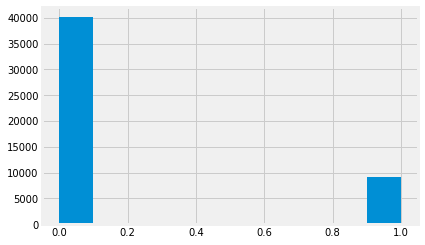

In [54]:
# explore how many purchase there really exist
plt.hist((clean_df.purchase_90_bin))
plt.show()

### We are just looking at accuracy and we are not looking at the whole picture, let's integrate precision, recall, AUC and F1 to our function so we can visualize it.

In [55]:
# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test,y_hat)
precision = metrics.precision_score(y_test,y_hat,average='macro')
recall = metrics.recall_score(y_test,y_hat,average='macro')
roc_auc = roc_auc_score(y_hat,y_test)
f1_score = metrics.f1_score(y_test,y_hat,average='macro')

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(precision))

print('Logistic regression Recall: {:.2f}'
     .format(recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(f1_score))

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
Logistic regression Precision: 0.73
Logistic regression Recall: 0.66
Logistic regression AUC: 0.73
Accuracy of Logistic regression F1 Score: 0.68


In [57]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# fit LR to our data
LR.fit(X_train, y_train)
LR_scores = cross_val_score(LR, X_train, y_train, cv=3)
LR_mean = LR_scores.mean()
LR_training = LR.score(X_train, y_train)
LR_test = LR.score(X_test, y_test)
y_hat = cross_val_predict(LR, X_train, y_train, cv=3)
lr_accuracy = accuracy_score(y_train,y_hat)
lr_precision = precision_score(y_train,y_hat,average='macro')
lr_recall = recall_score(y_train,y_hat,average='macro')
lr_roc_auc = roc_auc_score(y_hat,y_train)
lr_f1_score = f1_score(y_train,y_hat,average='macro')


print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(LR.score(X_train, y_train)))

print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(LR.score(X_test, y_test)))

print('Logistic regression Precision: {:.2f}'
     .format(lr_precision))

print('Logistic regression Recall: {:.2f}'
     .format(lr_recall))
      
print('Logistic regression AUC: {:.2f}'
      .format(lr_roc_auc))

print('Accuracy of Logistic regression F1 Score: {:.2f}'
     .format(lr_f1_score))

###########################################
print('-----------------------------------\n')

# fit LR to our data
svc.fit(X_train, y_train)
svc_scores = cross_val_score(svc, X_train, y_train, cv=3)
svc_mean = svc_scores.mean()
svc_training = svc.score(X_train, y_train)
svc_test = svc.score(X_test, y_test)
y_hat = cross_val_predict(svc, X_train, y_train, cv=3)
svc_accuracy = accuracy_score(y_train,y_hat)
svc_precision = precision_score(y_train,y_hat,average='macro')
svc_recall = recall_score(y_train,y_hat,average='macro')
svc_roc_auc = roc_auc_score(y_hat,y_train)
svc_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))

print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

print('SVC Precision: {:.2f}'
     .format(svc_precision))

print('SVC Recall: {:.2f}'
     .format(svc_recall))
      
print('SVC AUC: {:.2f}'
      .format(svc_roc_auc))

print('SVC F1 Score: {:.2f}'
     .format(svc_f1_score))

###########################################
print('-----------------------------------\n')

# KNearestNeighbors
knn.fit(X_train, y_train)
knn_scores = cross_val_score(knn, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()
knn_training = knn.score(X_train, y_train)
knn_test = knn.score(X_test, y_test)
y_hat = cross_val_predict(knn, X_train, y_train, cv=3)
knn_accuracy = accuracy_score(y_train,y_hat)
knn_precision = precision_score(y_train,y_hat,average='macro')
knn_recall = recall_score(y_train,y_hat,average='macro')
knn_roc_auc = roc_auc_score(y_hat,y_train)
knn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

print('K-NN Precision: {:.2f}'
     .format(knn_precision))

print('K-NN Recall: {:.2f}'
     .format(knn_recall))
      
print('K-NN AUC: {:.2f}'
      .format(knn_roc_auc))

print('K-NN F1 Score: {:.2f}'
     .format(knn_f1_score))

###########################################
print('-----------------------------------\n')

# Decision Tree
dt.fit(X_train, y_train)
dt_scores = cross_val_score(dt, X_train, y_train, cv=3)
dt_mean = dt_scores.mean()
dt_training = dt.score(X_train, y_train)
dt_test = dt.score(X_test, y_test)
y_hat = cross_val_predict(dt, X_train, y_train, cv=3)
dt_accuracy = accuracy_score(y_train,y_hat)
dt_precision = precision_score(y_train,y_hat,average='macro')
dt_recall = recall_score(y_train,y_hat,average='macro')
dt_roc_auc = roc_auc_score(y_hat,y_train)
dt_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(dt.score(X_train, y_train)))

print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(dt.score(X_test, y_test)))

print('Decision Tree Precision: {:.2f}'
     .format(dt_precision))

print('Decision Tree Recall: {:.2f}'
     .format(dt_recall))
      
print('Decision Tree AUC: {:.2f}'
      .format(dt_roc_auc))

print('Decision Tree F1 Score: {:.2f}'
     .format(dt_f1_score))

###########################################
print('-----------------------------------\n')

# Gradient Boosting Classifier
gb.fit(X_train, y_train)
gb_scores = cross_val_score(gb, X_train, y_train, cv=3)
gb_mean = gb_scores.mean()
gb_training = gb.score(X_train, y_train)
gb_test = gb.score(X_test, y_test)
y_hat = cross_val_predict(gb, X_train, y_train, cv=3)
gb_accuracy = accuracy_score(y_train,y_hat)
gb_precision = precision_score(y_train,y_hat,average='macro')
gb_recall = recall_score(y_train,y_hat,average='macro')
gb_roc_auc = roc_auc_score(y_hat,y_train)
gb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Gradient Boosting classifier on training set: {:.2f}'
     .format(gb.score(X_train, y_train)))

print('Accuracy of Gradient Boosting classifier on test set: {:.2f}'
     .format(gb.score(X_test, y_test)))

print('Gradient Boosting Precision: {:.2f}'
     .format(gb_precision))

print('Gradient Boosting Recall: {:.2f}'
     .format(gb_recall))
      
print('Gradient Boosting AUC: {:.2f}'
      .format(gb_roc_auc))

print('Gradient Boosting F1 Score: {:.2f}'
     .format(gb_f1_score))

###########################################
print('-----------------------------------\n')

# Random Forest Classifier
rf.fit(X_train, y_train)
rf_scores = cross_val_score(rf, X_train, y_train, cv=3)
rf_mean = rf_scores.mean()
rf_training = rf.score(X_train, y_train)
rf_test = rf.score(X_test, y_test)
y_hat = cross_val_predict(rf, X_train, y_train, cv=3)
rf_accuracy = accuracy_score(y_train,y_hat)
rf_precision = precision_score(y_train,y_hat,average='macro')
rf_recall = recall_score(y_train,y_hat,average='macro')
rf_roc_auc = roc_auc_score(y_hat,y_train)
rf_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

print('Random Forest Precision: {:.2f}'
     .format(rf_precision))

print('Random Forest Recall: {:.2f}'
     .format(rf_recall))
      
print('Random Forest AUC: {:.2f}'
      .format(rf_roc_auc))

print('Random Forest F1 Score: {:.2f}'
     .format(rf_f1_score))

###########################################
print('-----------------------------------\n')

# NeuralNet Classifier
nn.fit(X_train, y_train)
nn_scores = cross_val_score(nn, X_train, y_train, cv=3)
nn_mean = nn_scores.mean()
nn_training = nn.score(X_train, y_train)
nn_test = nn.score(X_test, y_test)
y_hat = cross_val_predict(nn, X_train, y_train, cv=3)
nn_accuracy = accuracy_score(y_train,y_hat)
nn_precision = precision_score(y_train,y_hat,average='macro')
nn_recall = recall_score(y_train,y_hat,average='macro')
nn_roc_auc = roc_auc_score(y_hat,y_train)
nn_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of NeuralNet classifier on training set: {:.2f}'
     .format(nn.score(X_train, y_train)))

print('Accuracy of NeuralNet classifier on test set: {:.2f}'
     .format(nn.score(X_test, y_test)))

print('NeuralNet Precision: {:.2f}'
     .format(nn_precision))

print('NeuralNet Recall: {:.2f}'
     .format(nn_recall))
      
print('NeuralNet AUC: {:.2f}'
      .format(nn_roc_auc))

print('NeuralNet F1 Score: {:.2f}'
     .format(nn_f1_score))

###########################################
print('-----------------------------------\n')

# Naives Bayes
gnb.fit(X_train, y_train)
gnb_scores = cross_val_score(gnb, X_train, y_train, cv=3)
gnb_mean = gnb_scores.mean()
gnb_training = gnb.score(X_train, y_train)
gnb_test = gnb.score(X_test, y_test)
y_hat = cross_val_predict(gnb, X_train, y_train, cv=3)
gnb_accuracy = accuracy_score(y_train,y_hat)
gnb_precision = precision_score(y_train,y_hat,average='macro')
gnb_recall = recall_score(y_train,y_hat,average='macro')
gnb_roc_auc = roc_auc_score(y_hat,y_train)
gnb_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))

print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

print('GNB Precision: {:.2f}'
     .format(gnb_precision))

print('GNB Recall: {:.2f}'
     .format(gnb_recall))
      
print('GNB AUC: {:.2f}'
      .format(gnb_roc_auc))

print('GNB F1 Score: {:.2f}'
     .format(gnb_f1_score))

###########################################
print('-----------------------------------\n')

# Adaptive Boosting
ab.fit(X_train, y_train)
ab_scores = cross_val_score(ab, X_train, y_train, cv=3)
ab_mean = ab_scores.mean()
ab_training = ab.score(X_train, y_train)
ab_test = ab.score(X_test, y_test)
y_hat = cross_val_predict(ab, X_train, y_train, cv=3)
ab_accuracy = accuracy_score(y_train,y_hat)
ab_precision = precision_score(y_train,y_hat,average='macro')
ab_recall = recall_score(y_train,y_hat,average='macro')
ab_roc_auc = roc_auc_score(y_hat,y_train)
ab_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of AdaBoost classifier on training set: {:.2f}'
     .format(ab.score(X_train, y_train)))

print('Accuracy of AdaBoost classifier on test set: {:.2f}'
     .format(ab.score(X_test, y_test)))

print('AdaBoost Precision: {:.2f}'
     .format(ab_precision))

print('AdaBoost Recall: {:.2f}'
     .format(ab_recall))
      
print('AdaBoost AUC: {:.2f}'
      .format(ab_roc_auc))

print('AdaBoost F1 Score: {:.2f}'
     .format(ab_f1_score))

###########################################
print('-----------------------------------\n')

# Linear Discriminant Analysis
lda.fit(X_train, y_train)
lda_scores = cross_val_score(lda, X_train, y_train, cv=3)
lda_mean = lda_scores.mean()
lda_training = lda.score(X_train, y_train)
lda_test = lda.score(X_test, y_test)
y_hat = cross_val_predict(lda, X_train, y_train, cv=3)
lda_accuracy = accuracy_score(y_train,y_hat)
lda_precision = precision_score(y_train,y_hat,average='macro')
lda_recall = recall_score(y_train,y_hat,average='macro')
lda_roc_auc = roc_auc_score(y_hat,y_train)
lda_f1_score = f1_score(y_train,y_hat,average='macro')

print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))

print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))

print('LDA Precision: {:.2f}'
     .format(lda_precision))

print('LDA Recall: {:.2f}'
     .format(lda_recall))
      
print('LDA AUC: {:.2f}'
      .format(lda_roc_auc))

print('LDA F1 Score: {:.2f}'
     .format(lda_f1_score))

###########################################

# Create a Dataframe with the results.
clf_df_3 = {'Classifiers': ['Logistic Reg.', 'SVC', 'KNN', 'Dec Tree', 'Grad Boosting', 'Random Forest', 'Neural Nets', 'Naives Bayes', 'Adaptive Boosting', 'LDA'], 
    'Crossval Mean Scores': [LR_mean, svc_mean, knn_mean, dt_mean, gb_mean, rf_mean, nn_mean, gnb_mean, ab_mean, lda_mean],
         'Accuracy Training Set':[LR_training, svc_training, knn_training, dt_training, gb_training, rf_training, nn_training, gnb_training, ab_training, lda_training],
         'Accuracy Test Set':[LR_test, svc_test, knn_test, dt_test, gb_test, rf_test, nn_test, gnb_test, ab_test, lda_test],
           'Precision':[lr_precision,svc_precision,knn_precision,dt_precision,gb_precision,rf_precision,nn_precision,gnb_precision,ab_precision,lda_precision],
           'Recall':[lr_recall,svc_recall,knn_recall,dt_recall,gb_recall,rf_recall,nn_recall,gnb_recall,ab_recall,lda_recall],
            'AUC':[lr_roc_auc,svc_roc_auc,knn_roc_auc,dt_roc_auc,gb_roc_auc,rf_roc_auc,nn_roc_auc,gnb_roc_auc,ab_roc_auc,lda_roc_auc],
           'F1 Score':[lr_f1_score,svc_f1_score,knn_f1_score,dt_f1_score,gb_f1_score,rf_f1_score,nn_f1_score,gnb_f1_score,ab_f1_score,lda_f1_score]}

clf_results = pd.DataFrame(data=clf_df_3)

Accuracy of Logistic regression classifier on training set: 0.83
Accuracy of Logistic regression classifier on test set: 0.84
Logistic regression Precision: 0.73
Logistic regression Recall: 0.65
Logistic regression AUC: 0.73
Accuracy of Logistic regression F1 Score: 0.67
-----------------------------------

Accuracy of SVC classifier on training set: 0.85
Accuracy of SVC classifier on test set: 0.85
SVC Precision: 0.75
SVC Recall: 0.64
SVC AUC: 0.75
SVC F1 Score: 0.67
-----------------------------------

Accuracy of K-NN classifier on training set: 0.88
Accuracy of K-NN classifier on test set: 0.83
K-NN Precision: 0.71
K-NN Recall: 0.67
K-NN AUC: 0.71
K-NN F1 Score: 0.69
-----------------------------------

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.83
Decision Tree Precision: 0.70
Decision Tree Recall: 0.71
Decision Tree AUC: 0.70
Decision Tree F1 Score: 0.71
-----------------------------------

Accuracy of Gradient B

//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
//anaconda/envs/Python3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Accuracy of LDA classifier on training set: 0.83
Accuracy of LDA classifier on test set: 0.83
LDA Precision: 0.72
LDA Recall: 0.67
LDA AUC: 0.72
LDA F1 Score: 0.69


In [59]:
# we will sort them by F1 Score
clf_results_3 = clf_results.sort_values(by=['F1 Score'], ascending=False)
clf_results_3

Classifiers  Crossval Mean Scores  Accuracy Training Set  \
4      Grad Boosting              0.876104               0.880211   
8  Adaptive Boosting              0.873808               0.877158   
5      Random Forest              0.869593               0.996272   
3           Dec Tree              0.818371               1.000000   
2                KNN              0.827232               0.878806   
9                LDA              0.828151               0.828475   
0      Logistic Reg.              0.832662               0.833608   
1                SVC              0.839281               0.846062   
6        Neural Nets              0.829745               0.840686   
7       Naives Bayes              0.446836               0.287964   

   Accuracy Test Set  Precision    Recall       AUC  F1 Score  
4           0.880947   0.810979  0.755992  0.810979  0.778502  
8           0.878839   0.804864  0.755677  0.804864  0.776186  
5           0.876975   0.804491  0.729686  0.804491  0.757521  
3           0.825351   0.704116  0.708018  0.704116  0.706023  
2           0.834508   0.713809  0.672392  0.713809  0.688425  
9           0.833941   0.715622  0.668831  0.715622  0.686314  
0           0.839290   0.728003  0.651140  0.728003  0.674525  
1           0.849907   0.751829  0.643882  0.751829  0.671381  
6           0.843747   0.743387  0.601445  0.743387  0.622508  
7           0.275306   0.559901  0.586554  0.559901  0.435587

<img src="confusion_matrix.png">

### We will proceed with Gradiant Boosting and Random Forest for the sake of make a confussion matrix comparison

In [63]:
# let's run Gradient Boosting again 
y_pred = cross_val_predict(gb, X_train, y_train, cv=7)

In [64]:
print('Precision Score: ', precision_score(y_train, y_pred))
print('Recall Score: ', recall_score(y_train, y_pred))
print('F1 Score:', f1_score(y_train, y_pred))

Precision Score:  0.7218072508653671
Recall Score:  0.567947247706422
F1 Score: 0.6356999598876856


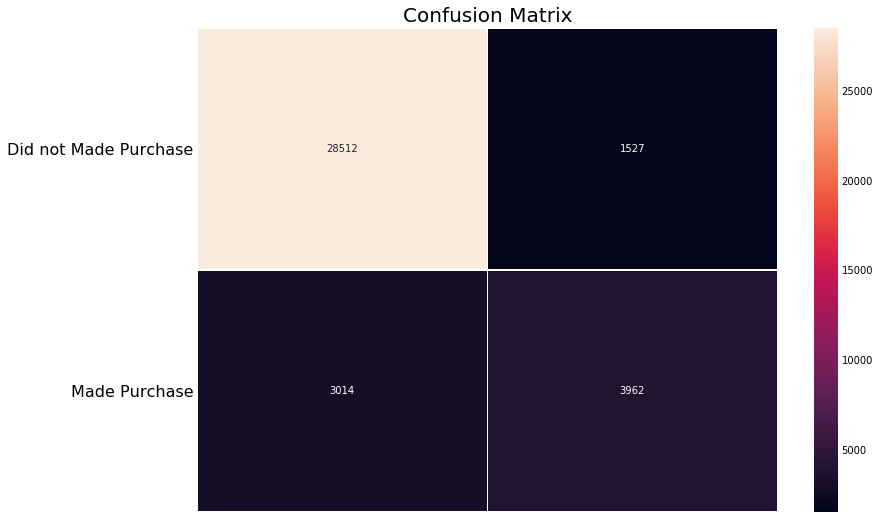

In [65]:
from sklearn.metrics import confusion_matrix

con_matrix = confusion_matrix(y_train, y_pred)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [66]:
# let's run Random Forest again 
y_pred_lr = cross_val_predict(rf, X_train, y_train, cv=7)

In [67]:
print('Precision Score: ', precision_score(y_train, y_pred_lr))
print('Recall Score: ', recall_score(y_train, y_pred_lr))
print('F1 Score:', f1_score(y_train, y_pred_lr))

Precision Score:  0.7138308457711443
Recall Score:  0.5141915137614679
F1 Score: 0.5977835180401633


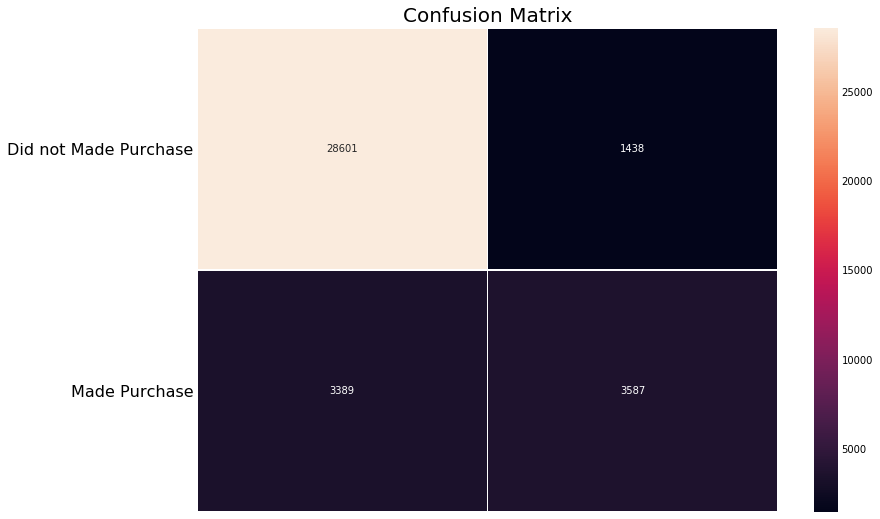

In [68]:
con_matrix = confusion_matrix(y_train, y_pred_lr)
f, ax = plt.subplots(figsize=(12, 8))

# plot the confusion matrix
sns.heatmap(con_matrix, annot=True, fmt="d", linewidths=.5, ax=ax)
plt.title("Confusion Matrix", fontsize=20)
plt.subplots_adjust(left=0.15, right=0.99, bottom=0.15, top=0.99)
ax.set_yticks(np.arange(con_matrix.shape[0]) + 0.5, minor=False)
ax.set_xticklabels("")
ax.set_yticklabels(['Did not Made Purchase', 'Made Purchase'], fontsize=16, rotation=360)
plt.show()

In [69]:
y_scores = cross_val_predict(rf, X_train, y_train, cv=7, method="predict_proba")

In [70]:
# sanity check
y_scores.shape

(37015, 2)

In [71]:
y_scores = y_scores[:, 1]

In [72]:
# sanity check
y_scores.shape

(37015,)

In [73]:
# How can we decide which threshold to use? 
# We want to return the scores instead of predictions with this code.
from sklearn.metrics import precision_recall_curve

precisions, recalls, threshold = precision_recall_curve(y_train, y_scores)

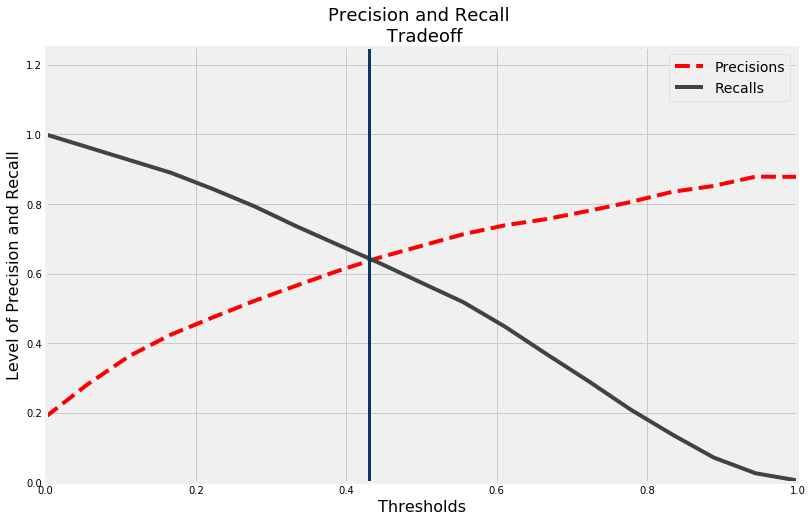

In [75]:
def precision_recall_curve(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(12,8))
    plt.plot(thresholds, precisions[:-1], "r--", label="Precisions")
    plt.plot(thresholds, recalls[:-1], "#424242", label="Recalls")
    plt.title("Precision and Recall \n Tradeoff", fontsize=18)
    plt.ylabel("Level of Precision and Recall", fontsize=16)
    plt.xlabel("Thresholds", fontsize=16)
    plt.legend(loc="best", fontsize=14)
    plt.xlim([0, 1])
    plt.ylim([0, 1.25])
    plt.axvline(x=0.43, linewidth=3, color="#0B3861")
    
    
precision_recall_curve(precisions, recalls, threshold)
plt.show()